In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
network = Sequential()
network.add(Dense(512, activation='relu', input_shape=(28*28,)))
network.add(Dense(10, activation='softmax'))

In [7]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2594 - accuracy: 0.9244
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1037 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0685 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0503 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0370 - accuracy: 0.9889


In [9]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0664 - accuracy: 0.9803


In [11]:
network.save("../mlp_model")

INFO:tensorflow:Assets written to: ../mlp_model\assets


In [13]:
reconstructed_model = load_model("../mlp_model")

In [14]:
new_digit = np.array(
[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,195,255,240,255,225,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,225,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,255,255,255,255,255,0,0,255,255,255,195,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,255,255,255,255,0,0,0,0,0,255,255,225,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,210,255,255,195,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,255,255,210,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,180,255,255,255,195,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,195,255,255,255,255,0,0,0,255,255,255,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,180,255,255,255,255,210,255,255,255,195,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,225,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,240,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,255,255,255,240,195,255,255,255,195,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,255,255,255,195,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,180,255,255,240,0,0,0,0,225,255,255,195,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,225,255,255,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,210,255,210,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,180,255,255,240,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,240,255,255,195,0,180,195,225,255,255,255,180,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,255,255,255,255,240,255,255,255,255,180,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,255,255,255,255,225,210,210,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,180,210,195,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
)


In [15]:
new_digit = new_digit.reshape((1, 28*28))
new_digit = new_digit.astype('float32')/255

In [16]:
result = reconstructed_model.predict(new_digit)

1/1 [==============================] - 0s 100ms/step


In [17]:
result

array([[1.8751910e-10, 1.4399504e-08, 5.7547249e-02, 6.7283858e-05,
        1.4791113e-15, 9.6012208e-08, 3.8883869e-07, 6.2609098e-12,
        9.4238502e-01, 9.9269844e-13]], dtype=float32)

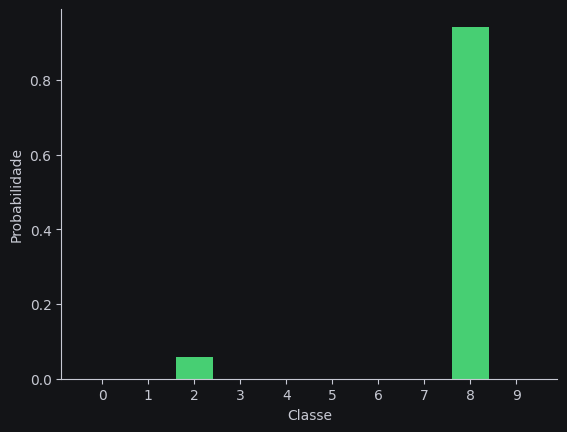

In [33]:
plt.rcParams['axes.facecolor'] = '#131417'
plt.rcParams['figure.facecolor'] = '#131417'
plt.bar(np.arange(10), result[0], color="#47CF73")
plt.xticks(np.arange(10))
plt.ylabel("Probabilidade")
plt.xlabel("Classe")

ax = plt.gca()
ax.xaxis.label.set_color('#C7C9D3')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('#C7C9D3')          #setting up Y-axis label color to blue

ax.tick_params(axis='x', colors='#C7C9D3')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='#C7C9D3')  #setting up Y-axis tick color to black

ax.spines['bottom'].set_color('#C7C9D3')        # setting up Y-axis tick color to red
ax.spines['left'].set_color('#C7C9D3')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('chart_probs.png', dpi=300)

In [19]:
result[0].argmax()

8